In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time


img_g = cv2.imread('wolves.png',0)
img_bgr = cv2.imread('wolves.png')
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2Lab)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [28]:
def int_diff_grey(img_grey,comp):
  height = img_grey.shape[0]
  length = img_grey.shape[1]
  d = np.zeros((height,length),dtype='int32')
  a = np.array(img_g, dtype = 'int32')

    
    """
    Neighbors are as follows:
    D1 P1 D2
    P2 X  P3
    D3 P4 D4"""

  for i in range(0,height):
    for j in range(0,length):
      if comp == 'D1':
        if [i,j] != [0,j] and [i,j] != [i,0]:
          d[i,j] = (a[i,j]-a[i-1,j-1])**2

      elif comp == 'D2':
        if [i,j] != [i,length-1] and [i,j] != [0,j]:
            d[i,j] = (a[i,j]-a[i-1,j+1])**2

      elif comp =='D3':
        if [i,j] != [height-1,j] and [i,j] != [i,0]:
            d[i,j] = (a[i,j]-a[i+1,j-1])**2

      elif comp =='D4':
        if [i,j] != [height-1,j] and [i,length-1]:
            d[i,j] = (a[i-1,j-1]-a[i,j])**2

      elif comp == 'P1':
        if [i,j] != [0,j]:
            d[i,j] = (a[i,j]-a[i-1,j])**2

      elif comp == 'P2':
        if [i,j] != [i,0]:
            d[i,j] = (a[i,j]-a[i,j-1])**2

      elif comp =='P3':
        if[i,j] != [i,length-1]:
            d[i,j] = (a[i,j]-a[i,j+1])**2

      elif comp =='P4':
        if[i,j] != [height-1,j]:
            d[i,j] = (a[i,j]-a[i+1,j])**2

  if comp == 'D1':
    d = d[:height-1,1:]
  elif comp == 'D2':
    d = d[1:,:length-1]
  elif comp == 'D3':
    d = d[1:,1:]
  elif comp == 'D4':
    d = d[:height-1,:length-1]

  elif comp == 'P1':
    d = d[1:,:]
  elif comp == 'P2':
    d = d[:,1:]
  elif comp == 'P3':
    d = d[:,:length-1]
  elif comp == 'P4':
    d = d[:height-1,:]

  return d



In [29]:
def int_diff_other(img,comp):
  height = img.shape[0]
  length = img.shape[1]
  c1 = np.array((img[:,:,0]),dtype='int32')
  c2 = np.array((img[:,:,1]),dtype='int32')
  c3 = np.array((img[:,:,2]),dtype='int32')
  d = np.zeros((height,length),dtype='int32')

  for i in range(0,height):
    for j in range(0,length):
      if comp == 'D1':
        if [i,j] != [0,j] and [i,j] != [i,0]:
          d[i,j] = (c1[i,j]-c1[i-1,j-1])**2 + (c2[i,j]-c2[i-1,j-1])**2 + (c3[i,j]-c3[i-1,j-1])**2
      elif comp =='D2':
        if [i,j] != [i,length-1] and [i,j] != [0,j]:
            d[i,j] = (c1[i,j]-c1[i-1,j+1])**2 + (c2[i,j]-c2[i-1,j+1])**2 + (c3[i,j]-c3[i-1,j+1])**2
      elif comp =='D3':
        if [i,j] != [height-1,j] and [i,j] != [i,0]:
            d[i,j] = (c1[i,j]-c1[i+1,j-1])**2 + (c2[i,j]-c2[i+1,j-1])**2 + (c3[i,j]-c3[i+1,j-1])**2
      elif comp == 'D4':
        if [i,j] != [height-1,j] and [i,length-1]:
            d[i,j] = (c1[i-1,j-1]-c1[i,j])**2 + (c2[i-1,j-1]-c2[i,j])**2 + (c3[i-1,j-1]-c3[i,j])**2
      elif comp == 'P1':
        if [i,j] != [0,j]:
            d[i,j] = (c1[i,j]-c1[i,j-1])**2 + (c2[i,j]-c2[i,j-1])**2 + (c3[i,j]-c3[i,j-1])**2
      elif comp == 'P2':
        if [i,j] != [i,0]:
            d[i,j] = (c1[i,j]-c1[i-1,j])**2 + (c2[i,j]-c2[i-1,j])**2 + (c3[i,j]-c3[i-1,j])**2
      elif comp == 'P3':
        if[i,j] != [i,length-1]:
            d[i,j] = (c1[i,j]-c1[i,j+1])**2 + (c2[i,j]-c2[i,j+1])**2 + (c3[i,j]-c3[i,j+1])**2
      elif comp == 'P4':
        if[i,j] != [height-1,j]:
            d[i,j] = (c1[i,j]-c1[i+1,j])**2 + (c2[i,j]-c2[i+1,j])**2 + (c3[i,j]-c3[i+1,j])**2

  if comp == 'D1':
    d = d[:height-1,1:]
  elif comp == 'D2':
    d = d[1:,:length-1]
  elif comp == 'D3':
    d = d[1:,1:]
  elif comp == 'D4':
    d = d[:height-1,:length-1]

  elif comp == 'P1':
    d = d[1:,:]
  elif comp == 'P2':
    d = d[:,1:]
  elif comp == 'P3':
    d = d[:,:length-1]
  elif comp == 'P4':
    d = d[:height-1,:]

  return d

In [30]:
def hist(img,b,t):
  plt.hist(img.ravel(),b)
  plt.title(t)
  plt.xlabel('Pixel Values')
  plt.ylabel('Number of Pixels')
  plt.show() 

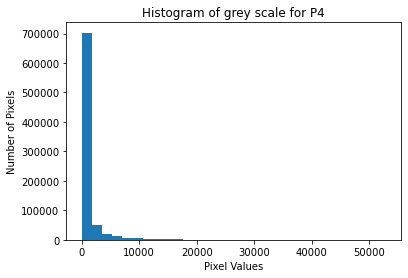

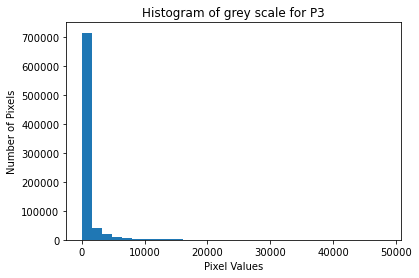

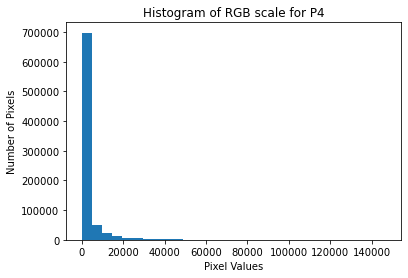

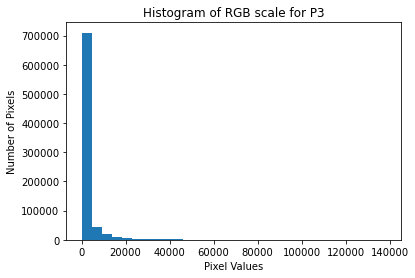

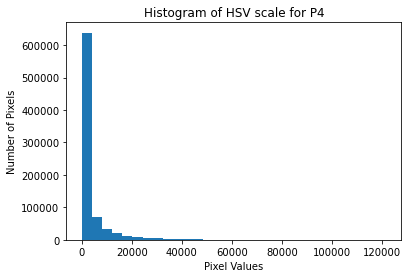

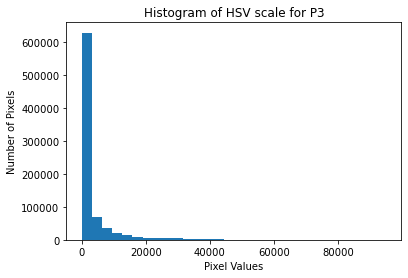

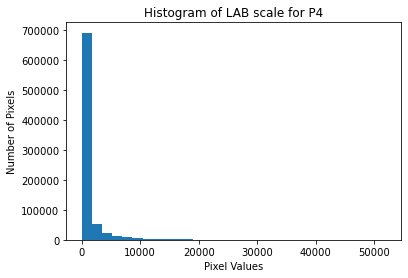

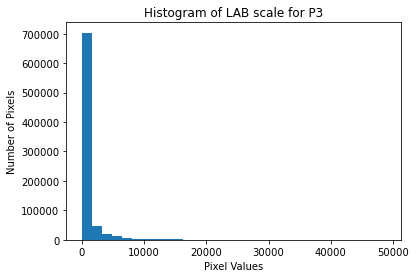

34.23432111740112


In [35]:
start_time = time.time()
grey_1 = int_diff_grey(img_g,'P4')
grey_2 = int_diff_grey(img_g,'P3')

hist(grey_1,30,'Histogram of grey scale for P4')
hist(grey_2,30,'Histogram of grey scale for P3')

bgr_1 = int_diff_other(img_bgr,'P4')
bgr_2 = int_diff_other(img_bgr,'P3')

hist(bgr_1,30,'Histogram of RGB scale for P4')
hist(bgr_2,30,'Histogram of RGB scale for P3')

hsv_1 = int_diff_other(img_hsv, 'P4')
hsv_2 = int_diff_other(img_hsv, 'P3')

hist(hsv_1,30,'Histogram of HSV scale for P4')
hist(hsv_2,30,'Histogram of HSV scale for P3')

lab_1 = int_diff_other(img_lab, 'P4')
lab_2 = int_diff_other(img_lab, 'P3')

hist(lab_1,30,'Histogram of LAB scale for P4')
hist(lab_2,30,'Histogram of LAB scale for P3')

t_total = time.time() - start_time
print(t_total)